In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

In [2]:
dataset2 = pd.read_csv('function1_2d.csv',index_col = 0)

In [6]:
dataset2['y']

0       140554.303333
1        98205.871542
2        54090.524314
3         9342.283121
4        61518.311357
            ...      
1995     10890.041083
1996     36801.174848
1997     13153.153776
1998      7306.557363
1999     47449.559024
Name: y, Length: 2000, dtype: float64

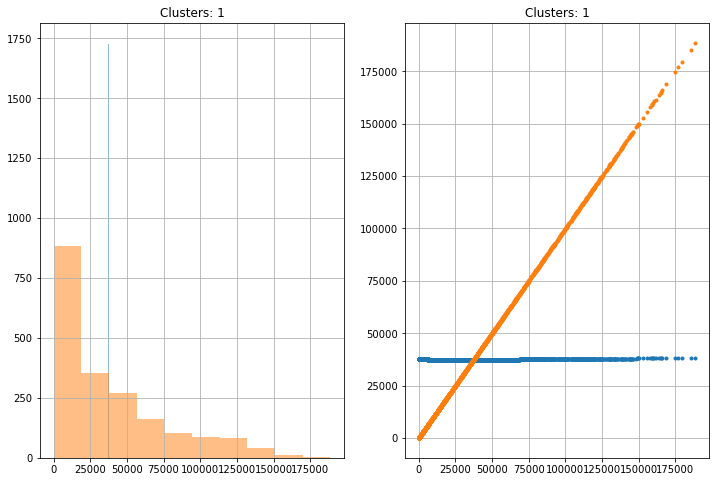

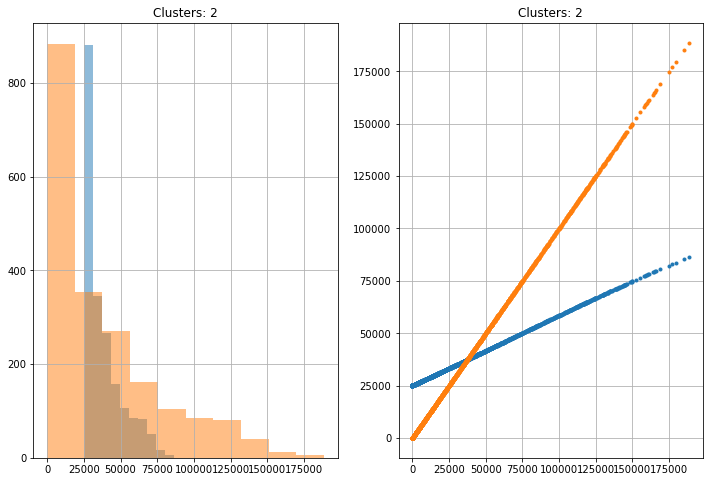

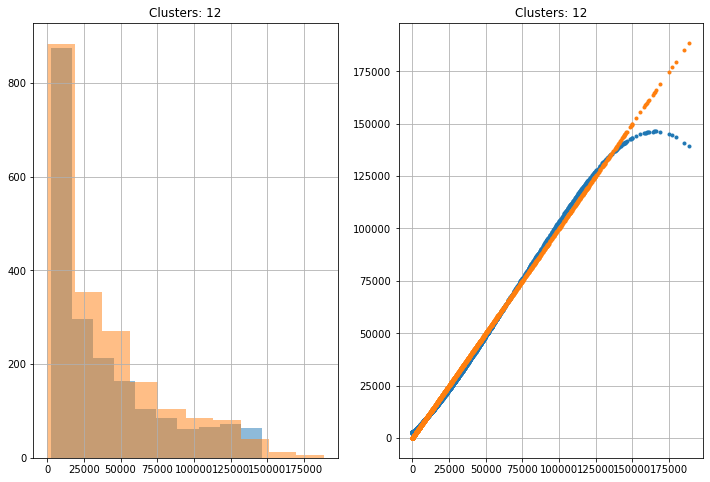

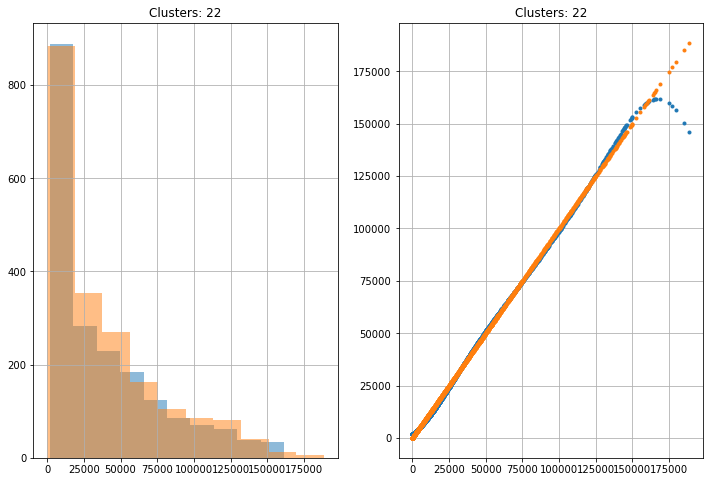

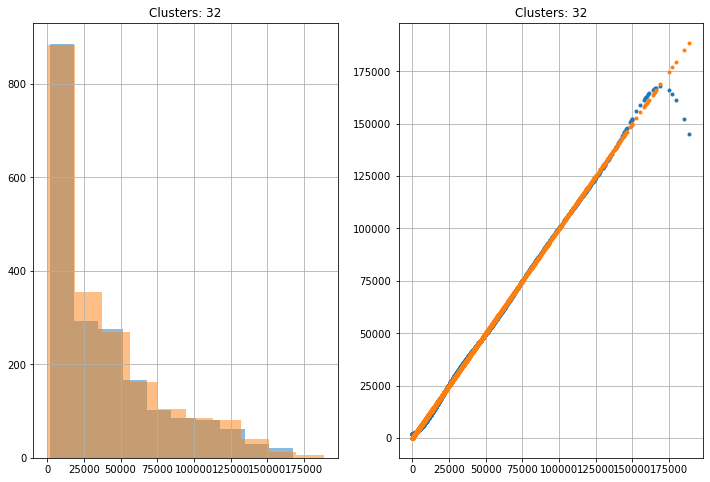

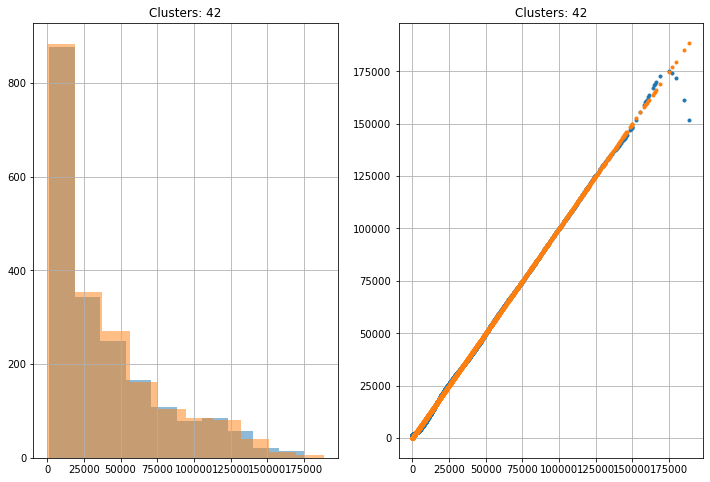

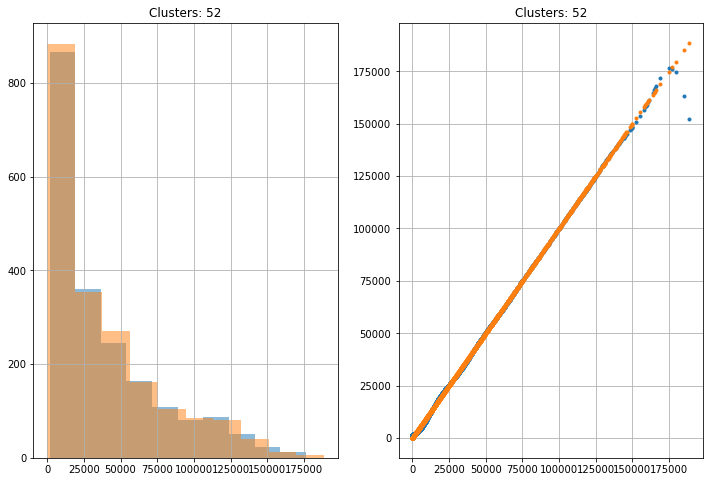

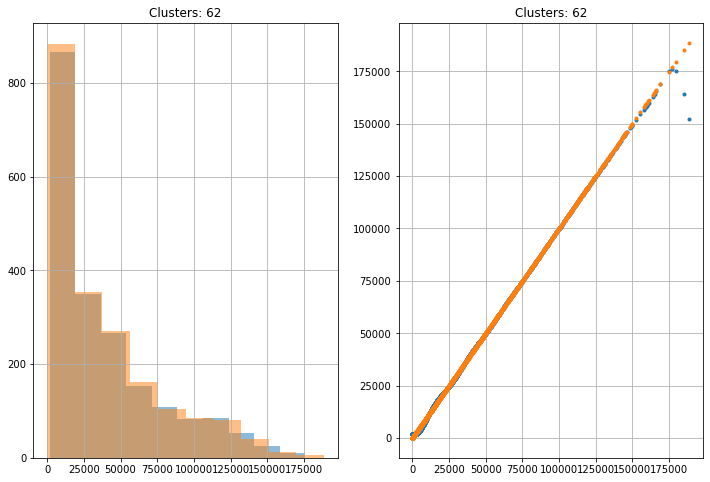

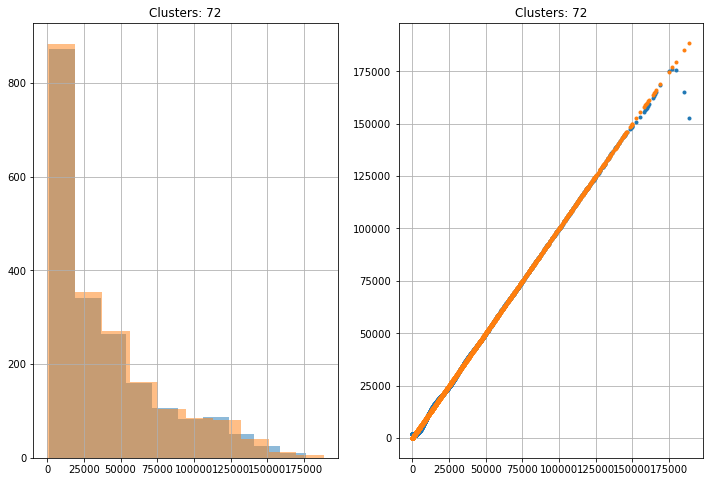

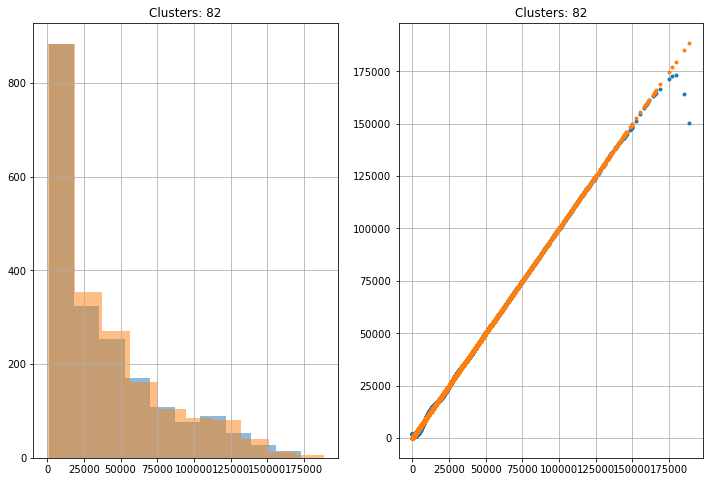

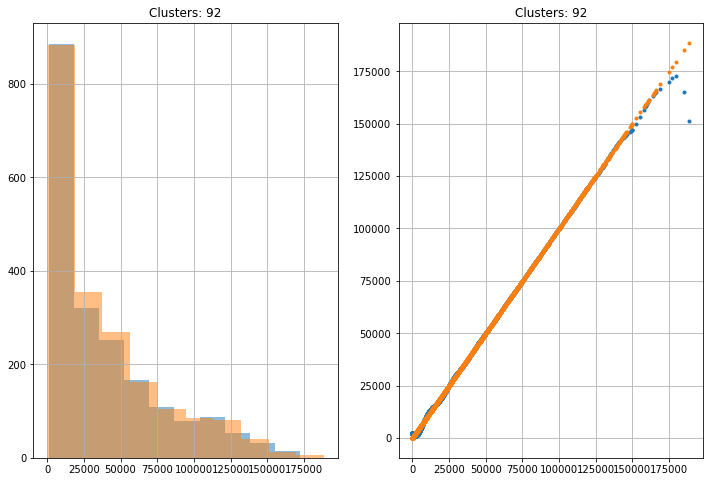

In [7]:
num_clusters = [1]
num_clusters.extend(range(2,100,10))
#num_clusters.extend(range(15, 31, 5))
#num_clusters.extend(range(40, 101, 10))

sse_list = []
label_list = []
cluster_centers_list = []
error_list = []

for n_clu in num_clusters:
    kmeans = KMeans(n_clusters=n_clu, random_state=42).fit(dataset2.to_numpy())
    sse_list.append(kmeans.inertia_)
    label_list.append(kmeans.labels_)
    cluster_centers_list.append(kmeans.cluster_centers_)  

    mean_centers = cluster_centers_list[-1]
  # print("Mean shape:", mean_centers.shape)
    corresponding_center = mean_centers[label_list[-1],:]

    X = dataset2.to_numpy()
    distance = np.linalg.norm(X-corresponding_center, axis=1)
    var = np.var(distance)*distance.size

    phi = np.ones((X.shape[0], 1))
    for i in range(n_clu):
        A = X-mean_centers[i,:]
    # print("A shape:", A.shape)
        A = np.exp(-np.linalg.norm(X-mean_centers[i,:], axis=1)**2/var)
    # print("A shape:", A.shape)
        phi = np.append(phi, np.exp(-np.linalg.norm(X-mean_centers[i,:], axis=1)**2/var).reshape(-1,1), axis=1)

    lmbda = 0
    W1 = (np.linalg.inv(phi.T @ phi + lmbda*np.identity(phi.shape[1])) @ phi.T) @ dataset2["y"]
    W1 = W1.reshape(-1,1)
    pred = phi @ W1

    plt.figure(figsize=[12,8])
    plt.title("Clusters: "+str(n_clu))
    plt.subplot(1, 2, 1)
    plt.hist(pred, alpha=0.5)
    plt.hist(dataset2["y"], alpha=0.5)
    plt.title("Clusters: "+str(n_clu))
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.plot(dataset2["y"], pred, ".")
    plt.plot(dataset2["y"], dataset2["y"], '.')
    plt.title("Clusters: "+str(n_clu))
    plt.grid()
    plt.savefig('')
    plt.show()
    error = np.linalg.norm(dataset2["y"].to_numpy().reshape(-1,1)-pred)
    error_list.append(error)

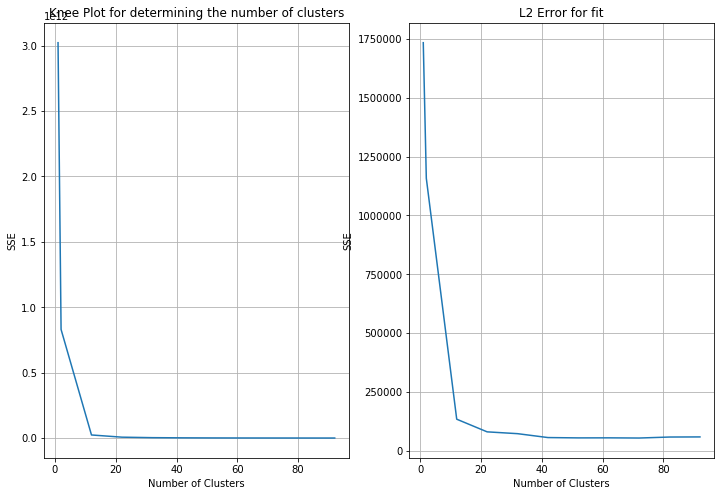

In [9]:
plt.figure(figsize=[12,8])
plt.subplot(1,2,1)
plt.plot(num_clusters, sse_list)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Knee Plot for determining the number of clusters")
plt.grid()
plt.subplot(1,2,2)
plt.plot(num_clusters, error_list)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title(("L2 Error for fit"))
plt.grid()
plt.show()

In [10]:
error_list = np.array(error_list)
df_error = pd.DataFrame({"Clusters":num_clusters, "Error":error_list})
df_error.sort_values(by=["Error"], ascending=True, inplace=True)
df_error

,Clusters,Error
8,72,5.379793e+04
6,52,5.438045e+04
7,62,5.459414e+04
5,42,5.579187e+04
9,82,5.804521e+04
10,92,5.852753e+04
4,32,7.236639e+04
3,22,8.008669e+04
2,12,1.338768e+05
1,2,1.158333e+06


In [25]:
def create_datasets(data,train_size,cv_size):
    data.sample(frac=1).reset_index(drop=True)
    data_train=data[0:train_size]
    data_cv=data[train_size:train_size+cv_size]
    data_test=data[cv_size+train_size:]
    return(data_train,data_cv,data_test)
    

In [26]:
lambda_list = [0.01,0.1,1,5,10,50,100]
trDS2, cvDS2, tDS2 = create_datasets(dataset2,1400,400)

In [111]:
def f(ds,l,n_clu):
    sse_list = []
    label_list = []
    cluster_centers_list = []

    kmeans = KMeans(n_clusters=n_clu, random_state=42).fit(ds.to_numpy())
    sse_list.append(kmeans.inertia_)
    label_list.append(kmeans.labels_)
    cluster_centers_list.append(kmeans.cluster_centers_)  

    mean_centers = cluster_centers_list[-1]
  # print("Mean shape:", mean_centers.shape)
    corresponding_center = mean_centers[label_list[-1],:]

    X = ds.to_numpy()
    distance = np.linalg.norm(X-corresponding_center, axis=1)
    var = np.var(distance)*distance.size

    phi = np.ones((X.shape[0], 1))
    for i in range(n_clu):
        A = X-mean_centers[i,:]
    # print("A shape:", A.shape)
        A = np.exp(-np.linalg.norm(X-mean_centers[i,:], axis=1)**2/var)
    # print("A shape:", A.shape)
        phi = np.append(phi, np.exp(-np.linalg.norm(X-mean_centers[i,:], axis=1)**2/var).reshape(-1,1), axis=1)
    #lmbda = 1
    return(phi,mean_centers,var)


    W1 = (np.linalg.inv(phi.T @ phi + l*np.identity(phi.shape[1])) @ phi.T) @ dataset2["y"]
    W1 = W1.reshape(-1,1)
    pred = phi @ W1
    return(W1,)
    error = np.linalg.norm(dataset2["y"].to_numpy().reshape(-1,1)-pred)
    error_list.append(error)

In [248]:
optClds2 = 10

In [251]:
error_tr = []
error_cv = []
error_t = []
for l in range(len(lambda_list)):
    phi_tr = f(trDS2,l,optClds2)[0]
    phi_cv = f(cvDS2,l,optClds2)[0]
    phi_t = f(tDS2,l,optClds2)[0]
    w = (np.linalg.inv(phi_tr.T @ phi_tr + l*np.identity(phi_tr.shape[1])) @ phi_tr.T) @ trDS2["y"]
    pred_cv = phi_cv @ w
    pred_t = phi_t @ w
    pred_tr = phi_tr @ w
    error_cv.append(np.linalg.norm(cvDS2["y"].to_numpy().reshape(-1,1)-pred_cv))
    error_t.append(np.linalg.norm(tDS2["y"].to_numpy().reshape(-1,1)-pred_t))
    error_tr.append(np.linalg.norm(trDS2["y"].to_numpy().reshape(-1,1)-pred_tr))

In [252]:
pd.DataFrame(list(zip(lambda_list,error_tr,error_cv,error_t)),columns=["Lambda", "RMSE Train","RMSE CV","RMSE test"])


,Lambda,RMSE Train,RMSE CV,RMSE test
0,0.01,1.342346e+08,7.163260e+10,4.391649e+10
1,0.10,7.725896e+07,2.455017e+07,1.429189e+07
2,1.00,7.712640e+07,2.388405e+07,1.157202e+07
3,5.00,7.703276e+07,2.350169e+07,1.045728e+07
4,10.00,7.694996e+07,2.322309e+07,9.864774e+06


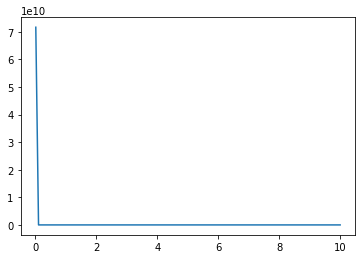

In [253]:
plt.plot(lambda_list,error_cv)

In [256]:
phi_tr = f(trDS2,l,optClds2)[0]
phi_t = f(tDS2,l,optClds2)[0]
w = (np.linalg.inv(phi_tr.T @ phi_tr + 0.01*np.identity(phi_tr.shape[1])) @ phi_tr.T) @ trDS2["y"]
pred_t = phi_t @ w
pred_tr = phi_tr @ w

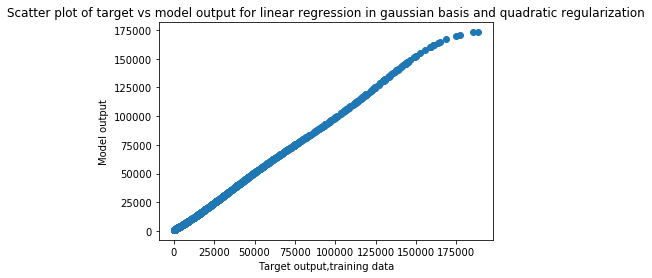

In [261]:
plt.scatter(trDS2.iloc[:,2],pred_tr)
plt.xlabel("Target output,training data")
plt.ylabel("Model output")
plt.title("Scatter plot of target vs model output for linear regression in gaussian basis and quadratic regularization")
plt.savefig("scatter_ds2quad.png")
plt.show()


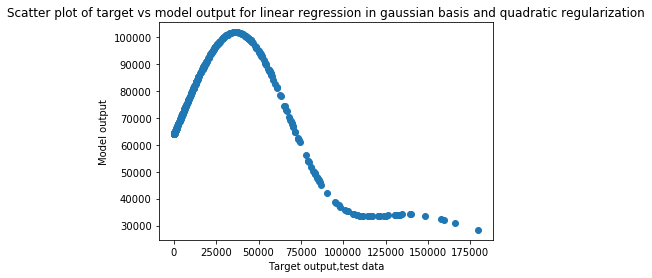

In [262]:
plt.scatter(cvDS2.iloc[:,2],pred_cv)


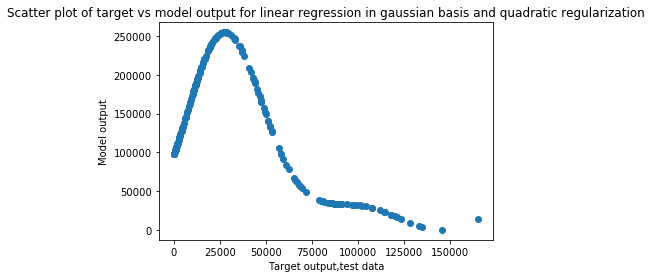

In [263]:
plt.scatter(tDS2.iloc[:,2],pred_t)
plt.xlabel("Target output,test data")
plt.ylabel("Model output")
plt.title("Scatter plot of target vs model output for linear regression in gaussian basis and quadratic regularization")
plt.savefig("scatter_ds2quadtest.png")
plt.show()


In [74]:
def tikhanov_reg(phi,mu,sigma,l):
    K = len(mu)
    phiT = np.zeros((K+1,K+1))
    phiT[0,0] = 1
    for i in range(1,K+1):
        for j in range(1,K+1):
            phiT[i,j] = np.exp(-(np.linalg.norm(mu[i-1]-mu[j-1])**2)/sigma**2)
    #l = 300
    #print(phiT.shape)
    pinv = np.linalg.inv(phi.T @ phi+l*phiT) @ phi.T
    return(pinv)

In [93]:
lambda_list = [0,0.01,0.1,1,5]#,10,50,100]


In [266]:
error_tr = []
error_cv = []
error_t = []
for l in range(len(lambda_list)):
#for l in [1]:
    phi_tr,mu_list,sig = f(trDS2,l,optClds2)
    phi_cv = f(cvDS2,l,optClds2)[0]
    phi_t = f(tDS2,l,optClds2)[0]
    #print(phi_tr.shape)
    #print(mu_list.shape)
    tikh = tikhanov_reg(phi_tr,mu_list,sig,l)
    #print("tikh shape ", tikh.shape)
    #print("phi_tr shape ", phi_tr.shape)
    #print("trDS2_y shape ", trDS2["y"].shape)

    w = tikh @ trDS2["y"]
    pred_cv = phi_cv @ w
    pred_t = phi_t @ w
    pred_tr = phi_tr @ w
    error_cv.append(np.linalg.norm(cvDS2["y"].to_numpy().reshape(-1,1)-pred_cv))
    error_t.append(np.linalg.norm(tDS2["y"].to_numpy().reshape(-1,1)-pred_t))
    error_tr.append(np.linalg.norm(trDS2["y"].to_numpy().reshape(-1,1)-pred_tr))

In [267]:
pd.DataFrame(list(zip(lambda_list,error_tr,error_cv,error_t)),columns=["Lambda", "RMSE Train","RMSE CV","RMSE test"])

,Lambda,RMSE Train,RMSE CV,RMSE test
0,0.01,1.342346e+08,7.163260e+10,4.391649e+10
1,0.10,7.813174e+07,2.581286e+11,1.672927e+11
2,1.00,7.835792e+07,3.202999e+11,1.030384e+11
3,5.00,7.694406e+07,2.397526e+11,1.560595e+11
4,10.00,7.773723e+07,2.210586e+11,1.336437e+11


Text(0, 0.5, 'rmse error')

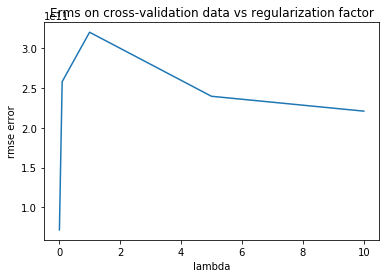

In [276]:
plt.plot(lambda_list,error_cv)
plt.title('Erms on cross-validation data vs regularization factor')
plt.xlabel('lambda')
plt.ylabel('rmse error')

(array([615., 245., 190., 120.,  70.,  58.,  57.,  32.,   9.,   4.]),
 array([1.68664226e-02, 1.88619706e+04, 3.77239243e+04, 5.65858781e+04,
        7.54478318e+04, 9.43097855e+04, 1.13171739e+05, 1.32033693e+05,
        1.50895647e+05, 1.69757600e+05, 1.88619554e+05]),
 <a list of 10 Patch objects>)

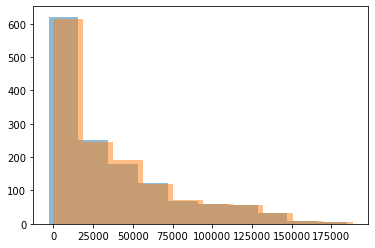

In [269]:
plt.hist(pred_tr, alpha=0.5)
plt.hist(trDS2["y"], alpha=0.5)

In [270]:
error_list = np.array(error_list)
df_error = pd.DataFrame({"lambda":lambda_list, "Error":error_cv})
df_error.sort_values(by=["Error"], ascending=True, inplace=True)
df_error

,lambda,Error
0,0.01,7.163260e+10
4,10.00,2.210586e+11
3,5.00,2.397526e+11
1,0.10,2.581286e+11
2,1.00,3.202999e+11


In [273]:
l = 0.01
phi_tr = f(trDS2,l,optClds2)[0]
phi_t = f(tDS2,l,optClds2)[0]
tikh = tikhanov_reg(phi_tr,mu_list,sig,0.01)
w = tikh @ trDS2["y"]
w = (np.linalg.inv(phi_tr.T @ phi_tr + 0.1*np.identity(phi_tr.shape[1])) @ phi_tr.T) @ trDS2["y"]
pred_t = phi_t @ w
pred_tr = phi_tr @ w

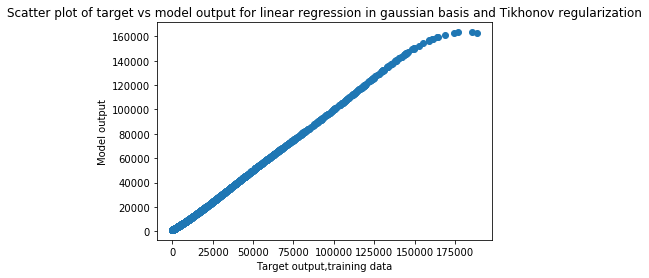

In [277]:
plt.scatter(trDS2.iloc[:,2],pred_tr)
plt.xlabel("Target output,training data")
plt.ylabel("Model output")
plt.title("Scatter plot of target vs model output for linear regression in gaussian basis and Tikhonov regularization")
plt.savefig("scatter_ds2tikhtr.png")
plt.show()

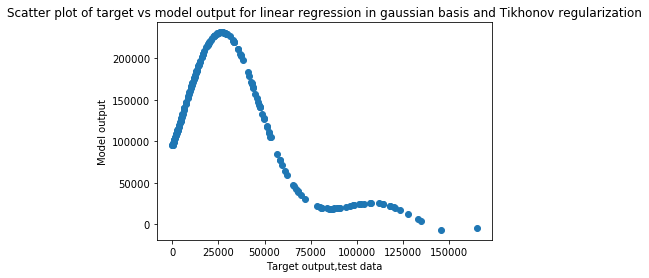

In [278]:
plt.scatter(tDS2.iloc[:,2],pred_t)
plt.xlabel("Target output,test data")
plt.ylabel("Model output")
plt.title("Scatter plot of target vs model output for linear regression in gaussian basis and Tikhonov regularization")
plt.savefig("scatter_ds2tikhtest.png")
plt.show()

In [101]:
df_new = pd.read_csv("processed_biasclean.csv",index_col = 0)

In [102]:
df_new.head()

,station,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC2,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lon,Slope,Solar radiation,Next_Tmin,Next_Tmax
0,1.0,28.7,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.203896,0.130928,0.0,0.0,0.0,0.0,126.991,2.7850,5992.895996,21.2,29.1
1,2.0,31.9,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.251771,0.127727,0.0,0.0,0.0,0.0,127.032,0.5141,5869.312500,22.5,30.5
2,3.0,31.6,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.257469,0.142125,0.0,0.0,0.0,0.0,127.058,0.2661,5863.555664,23.9,31.1
3,4.0,32.0,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.226002,0.134249,0.0,0.0,0.0,0.0,127.022,2.5348,5856.964844,24.3,31.7
4,5.0,31.4,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.249995,0.170021,0.0,0.0,0.0,0.0,127.135,0.5055,5859.552246,22.5,31.2


In [116]:
trDS3, cvDS3, tDS3 = create_datasets(df_new,1400,400)

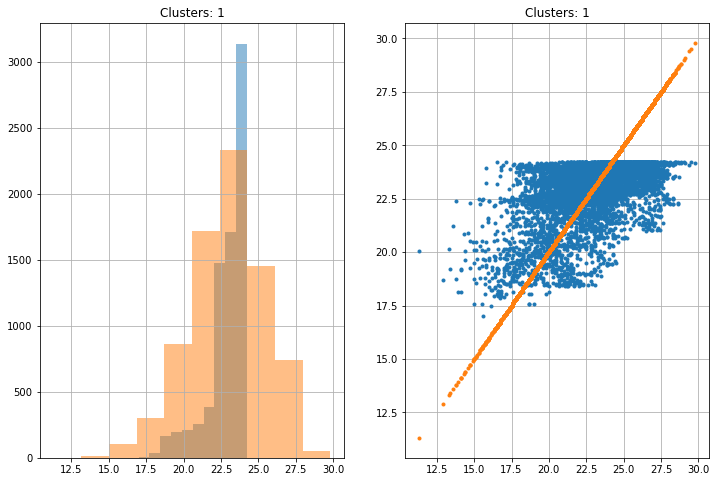

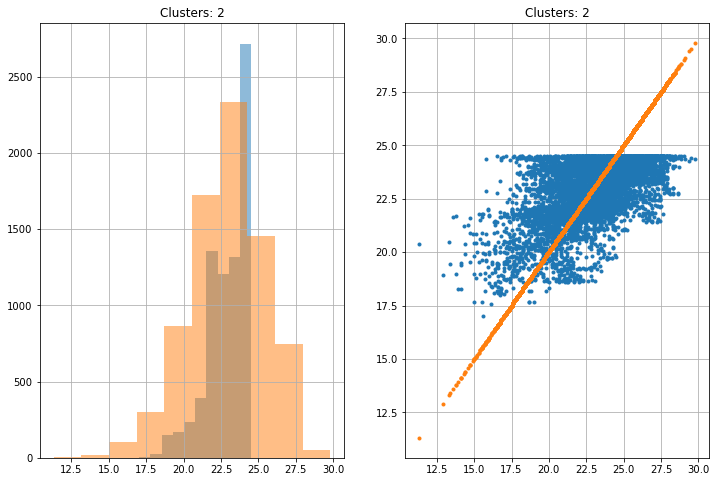

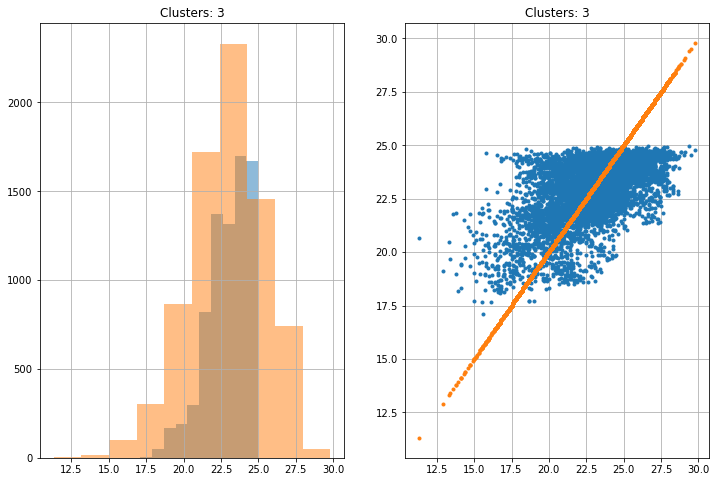

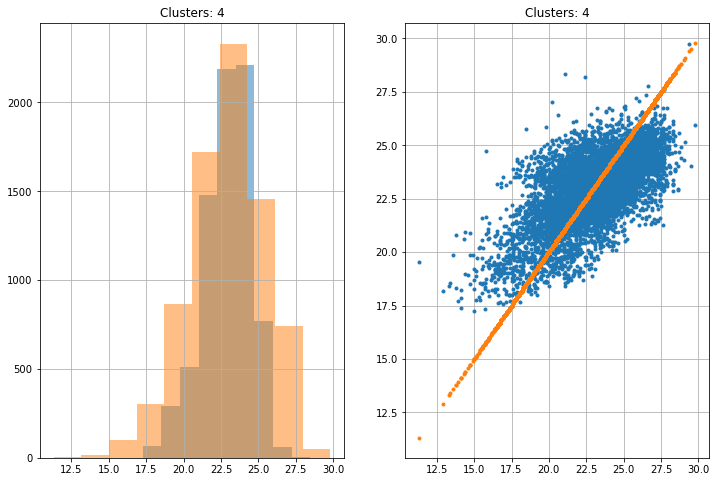

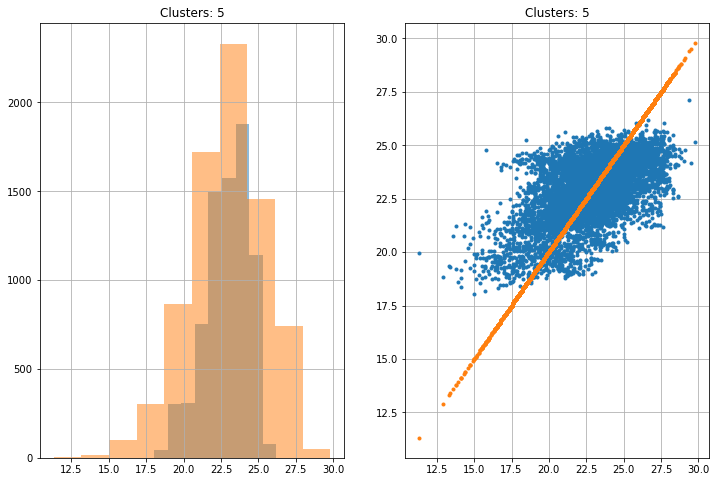

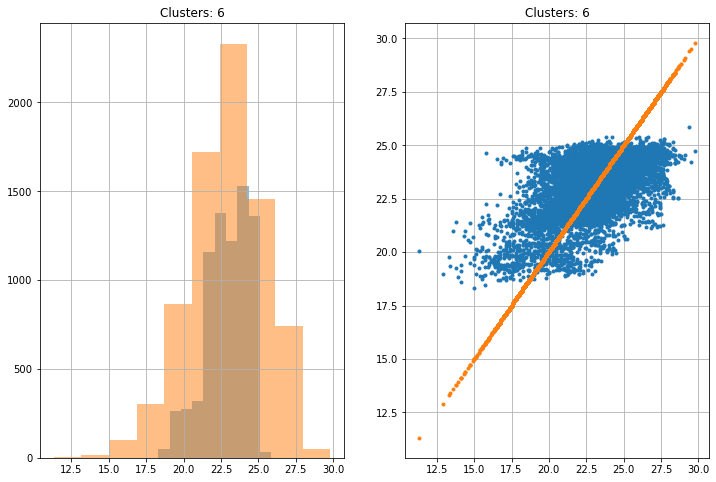

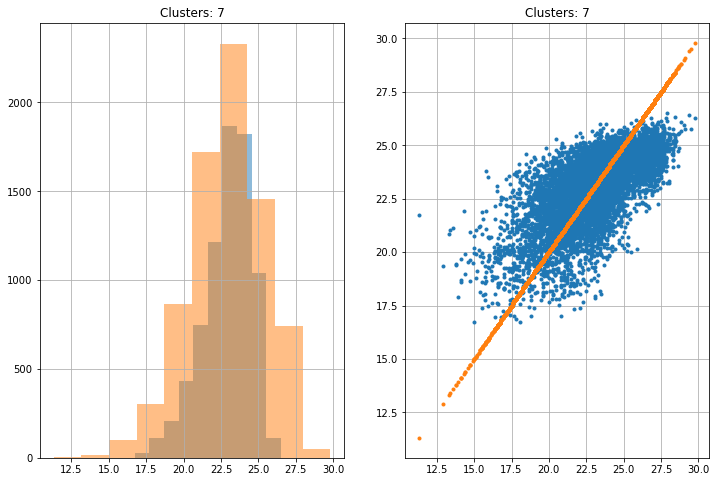

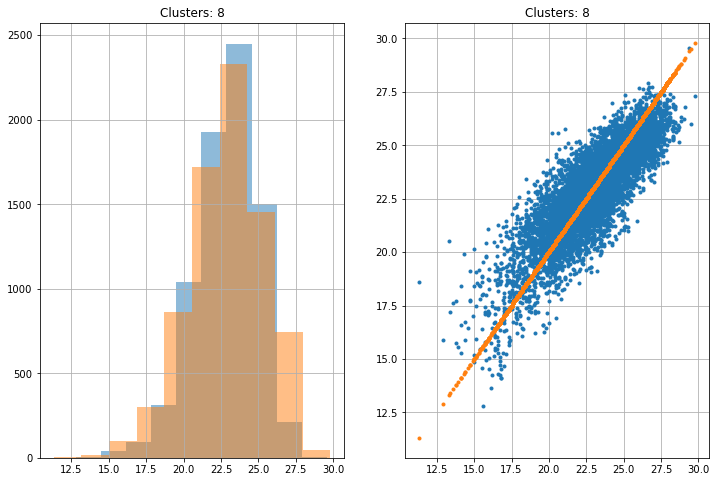

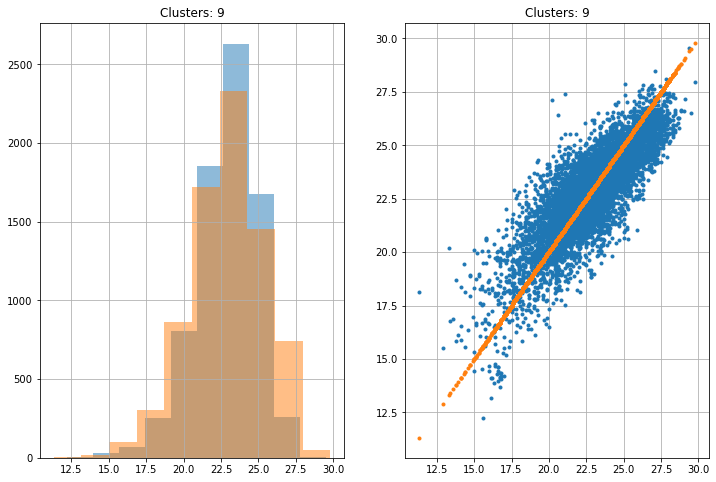

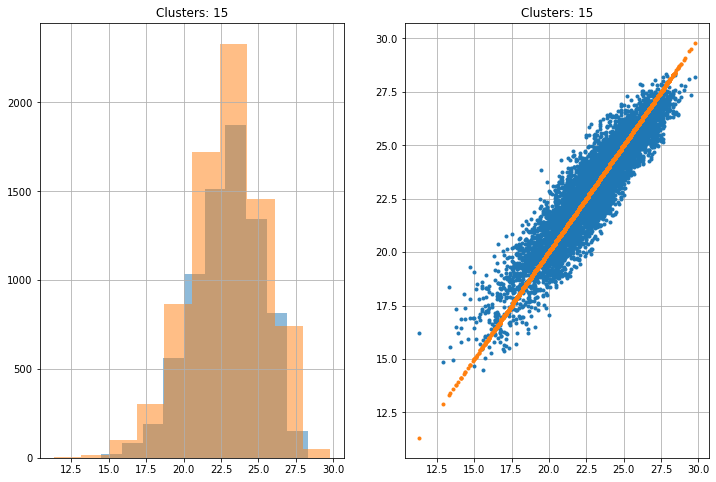

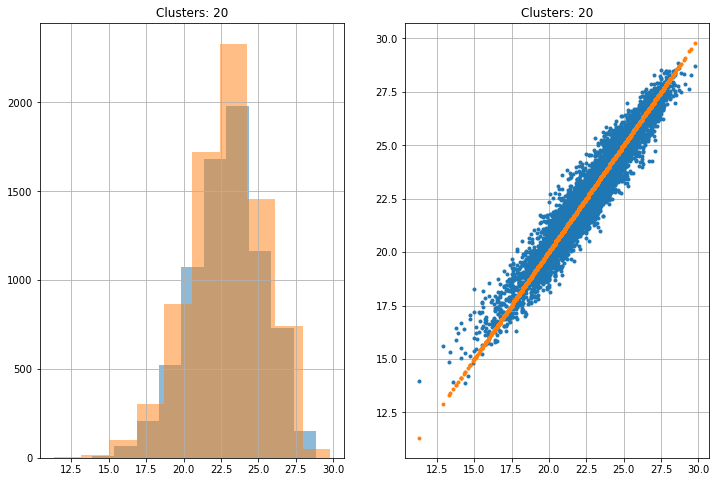

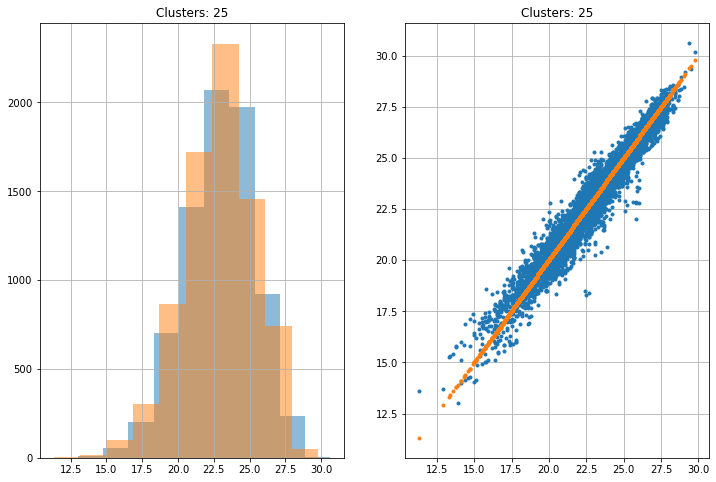

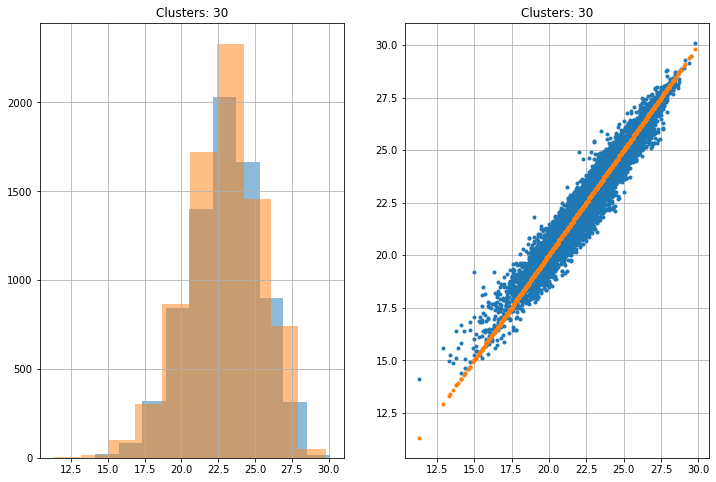

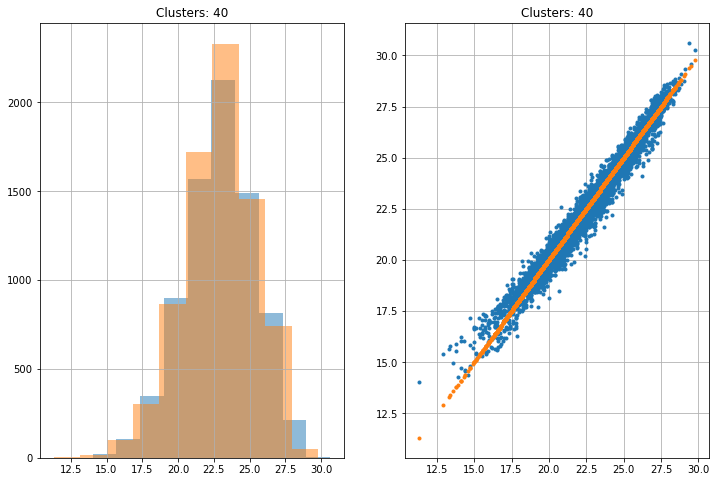

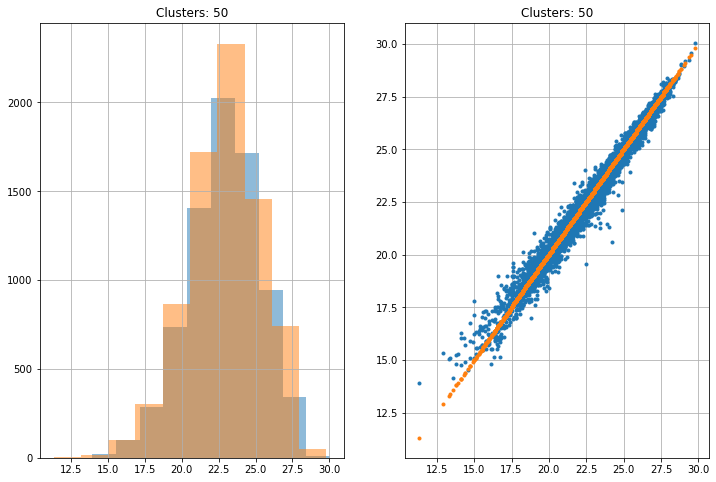

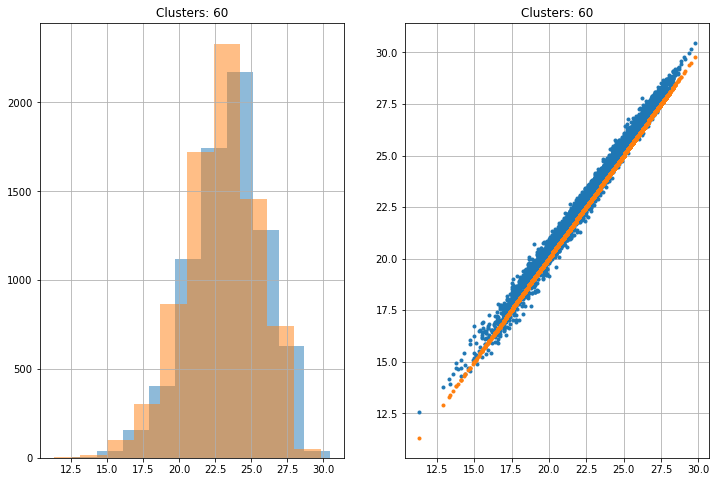

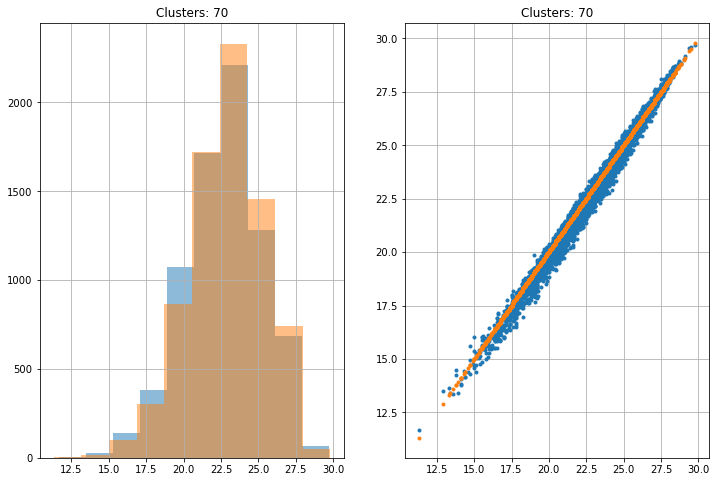

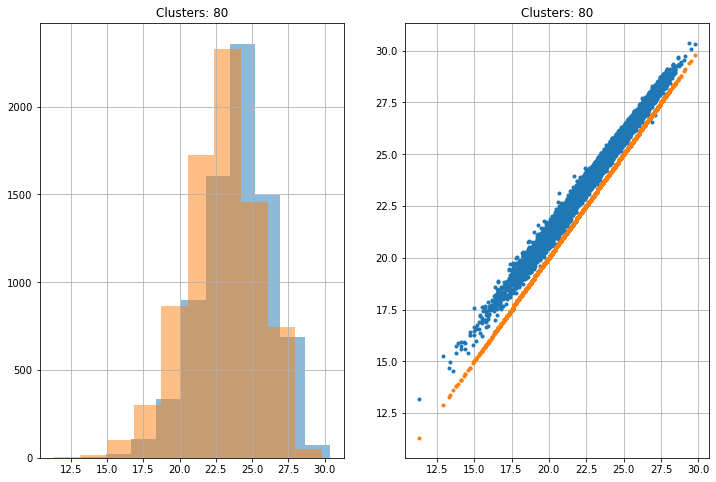

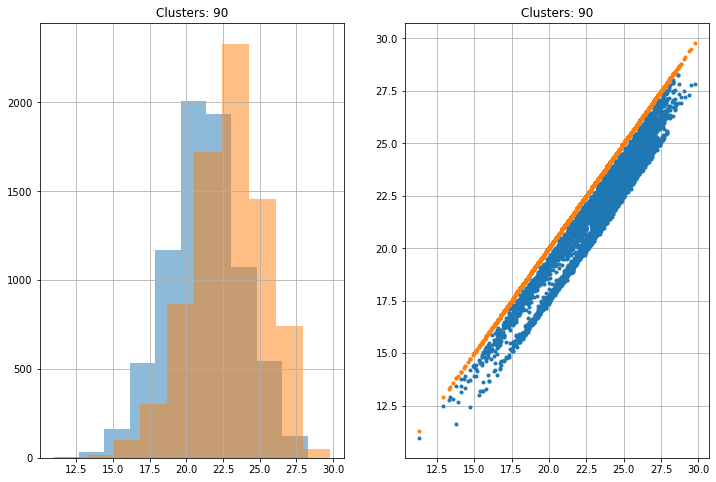

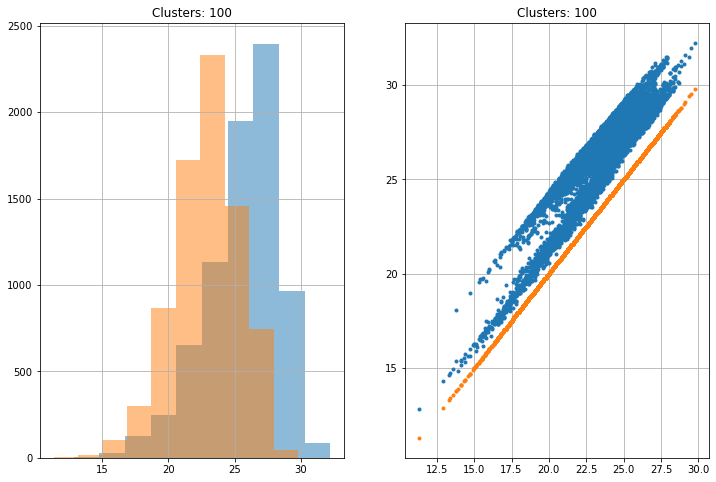

In [108]:
num_clusters = [1]
num_clusters.extend(range(2,10))
num_clusters.extend(range(15, 31, 5))
num_clusters.extend(range(40, 101, 10))

sse_list = []
label_list = []
cluster_centers_list = []
error_list = []

for n_clu in num_clusters:
    kmeans = KMeans(n_clusters=n_clu, random_state=42).fit(df_new.to_numpy())
    sse_list.append(kmeans.inertia_)
    label_list.append(kmeans.labels_)
    cluster_centers_list.append(kmeans.cluster_centers_)  

    mean_centers = cluster_centers_list[-1]
  # print("Mean shape:", mean_centers.shape)
    corresponding_center = mean_centers[label_list[-1],:]

    X = df_new.to_numpy()
    distance = np.linalg.norm(X-corresponding_center, axis=1)
    var = np.var(distance)*distance.size

    phi = np.ones((X.shape[0], 1))
    for i in range(n_clu):
        A = X-mean_centers[i,:]
    # print("A shape:", A.shape)
        A = np.exp(-np.linalg.norm(X-mean_centers[i,:], axis=1)**2/var)
    # print("A shape:", A.shape)
        phi = np.append(phi, np.exp(-np.linalg.norm(X-mean_centers[i,:], axis=1)**2/var).reshape(-1,1), axis=1)

    lmbda = 0
    W1 = (np.linalg.inv(phi.T @ phi + lmbda*np.identity(phi.shape[1])) @ phi.T) @ df_new["Next_Tmin"]
    W1 = W1.reshape(-1,1)
    pred = phi @ W1

    plt.figure(figsize=[12,8])
    plt.title("Clusters: "+str(n_clu))
    plt.subplot(1, 2, 1)
    plt.hist(pred, alpha=0.5)
    plt.hist(df_new["Next_Tmin"], alpha=0.5)
    plt.title("Clusters: "+str(n_clu))
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.plot(df_new["Next_Tmin"], pred, ".")
    plt.plot(df_new["Next_Tmin"], df_new["Next_Tmin"], '.')
    plt.title("Clusters: "+str(n_clu))
    plt.grid()
    plt.show()
    error = np.linalg.norm(df_new["Next_Tmin"].to_numpy().reshape(-1,1)-pred)
    error_list.append(error)

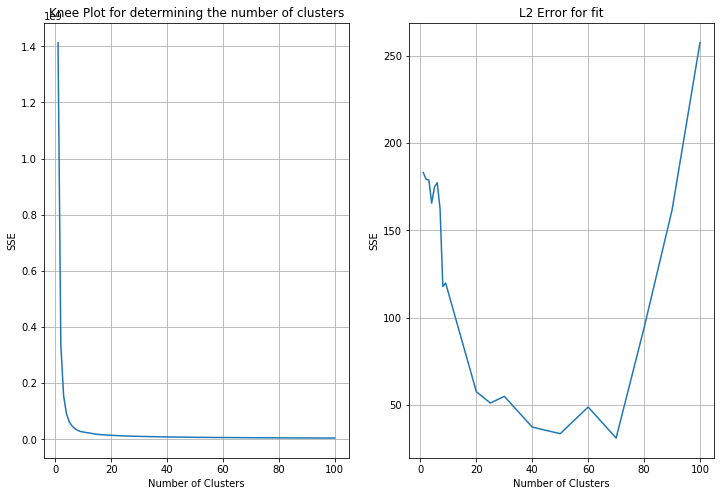

In [109]:
plt.figure(figsize=[12,8])
plt.subplot(1,2,1)
plt.plot(num_clusters, sse_list)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Knee Plot for determining the number of clusters")
plt.grid()
plt.subplot(1,2,2)
plt.plot(num_clusters, error_list)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title(("L2 Error for fit"))
plt.grid()
plt.show()

In [110]:
error_list = np.array(error_list)
df_error = pd.DataFrame({"Clusters":num_clusters, "Error":error_list})
df_error.sort_values(by=["Error"], ascending=True, inplace=True)
df_error

,Clusters,Error
16,70,30.924838
14,50,33.426059
13,40,37.177579
15,60,48.701849
11,25,50.975131
12,30,54.809176
10,20,57.450761
9,15,85.774037
17,80,94.100727
7,8,117.765293


In [215]:
optClds3 = 9

In [145]:
lambda_list = [0.01,0.1,1,5,10]

In [288]:
error_tr = []
error_cv = []
error_t = []
for l in range(len(lambda_list)):
    phi_tr = f(trDS3,l,optClds3)[0]
    phi_cv = f(cvDS3,l,optClds3)[0]
    phi_t = f(tDS3,l,optClds3)[0]
    w = (np.linalg.inv(phi_tr.T @ phi_tr + l*np.identity(phi_tr.shape[1])) @ phi_tr.T) @ trDS3['Next_Tmin']
    pred_cv = phi_cv @ w
    pred_t = phi_t @ w
    pred_tr = phi_tr @ w
    error_cv.append(np.linalg.norm(cvDS3['Next_Tmin'].to_numpy().reshape(-1,1)-pred_cv))
    error_t.append(np.linalg.norm(tDS3['Next_Tmin'].to_numpy().reshape(-1,1)-pred_t))
    error_tr.append(np.linalg.norm(trDS3['Next_Tmin'].to_numpy().reshape(-1,1)-pred_tr))

In [280]:
pd.DataFrame(list(zip(lambda_list,error_tr,error_cv,error_t)),columns=["Lambda", "RMSE Train","RMSE CV","RMSE test"])


,Lambda,RMSE Train,RMSE CV,RMSE test
0,0.01,3059.223194,304419.650206,1.309688e+06
1,0.10,2967.518183,1260.488802,4.119594e+04
2,1.00,2990.394887,1425.923297,3.959679e+04
3,5.00,3013.546633,1503.961583,3.900681e+04
4,10.00,3036.360553,1541.350490,3.868411e+04


Text(0, 0.5, 'rmse error')

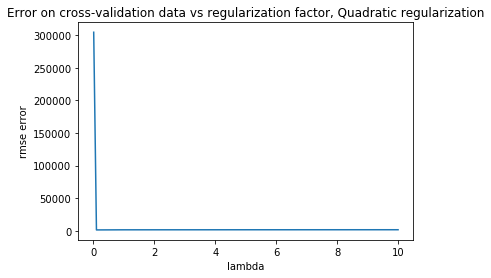

In [281]:
plt.plot(lambda_list,error_cv)
plt.title('Error on cross-validation data vs regularization factor, Quadratic regularization')
plt.xlabel('lambda')
plt.ylabel('rmse error')

In [282]:
error_list = np.array(error_list)
df_error = pd.DataFrame({"lambda":lambda_list, "Error":error_cv})
df_error.sort_values(by=["Error"], ascending=True, inplace=True)
df_error

,lambda,Error
1,0.10,1260.488802
2,1.00,1425.923297
3,5.00,1503.961583
4,10.00,1541.350490
0,0.01,304419.650206


In [291]:
l = .1
phi_tr = f(trDS3,l,optClds3)[0]
phi_t = f(tDS3,l,optClds3)[0]
w = (np.linalg.inv(phi_tr.T @ phi_tr + l*np.identity(phi_tr.shape[1])) @ phi_tr.T) @ trDS3['Next_Tmin']
pred_t = phi_t @ w
pred_tr = phi_tr @ w

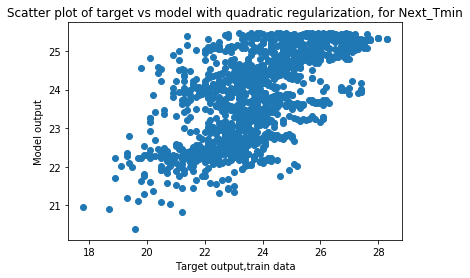

In [293]:
plt.scatter(trDS3.iloc[:,17],pred_tr)
plt.xlabel("Target output,train data")
plt.ylabel("Model output")
plt.title("Scatter plot of target vs model with quadratic regularization, for Next_Tmin")
plt.savefig("scatter_ds3quadtrainT_min.png")
plt.show()

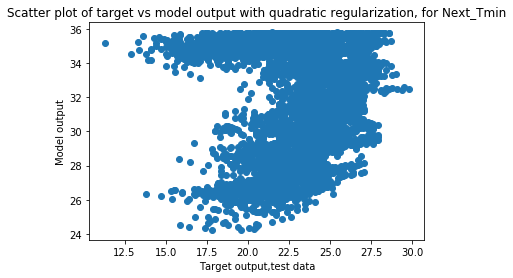

In [295]:
plt.scatter(tDS3.iloc[:,17],pred_t)
plt.xlabel("Target output,test data")
plt.ylabel("Model output")
plt.title("Scatter plot of target vs model output with quadratic regularization, for Next_Tmin")
plt.savefig("scatter_ds3quadtestT_min.png")
plt.show()

In [296]:
error_tr = []
error_cv = []
error_t = []
for l in range(len(lambda_list)):
    phi_tr = f(trDS3,l,optClds3)[0]
    phi_cv = f(cvDS3,l,optClds3)[0]
    phi_t = f(tDS3,l,optClds3)[0]
    w = (np.linalg.inv(phi_tr.T @ phi_tr + l*np.identity(phi_tr.shape[1])) @ phi_tr.T) @ trDS3['Next_Tmax']
    pred_cv = phi_cv @ w
    pred_t = phi_t @ w
    pred_tr = phi_tr @ w
    error_cv.append(np.linalg.norm(cvDS3['Next_Tmax'].to_numpy().reshape(-1,1)-pred_cv))
    error_t.append(np.linalg.norm(tDS3['Next_Tmax'].to_numpy().reshape(-1,1)-pred_t))
    error_tr.append(np.linalg.norm(trDS3['Next_Tmax'].to_numpy().reshape(-1,1)-pred_tr))

In [287]:
pd.DataFrame(list(zip(lambda_list,error_tr,error_cv,error_t)),columns=["Lambda", "RMSE Train","RMSE CV","RMSE test"])


,Lambda,RMSE Train,RMSE CV,RMSE test
0,0.01,4929.016531,414848.304201,3.312196e+06
1,0.10,4624.091536,1669.205290,3.690234e+04
2,1.00,4637.926168,2073.937532,3.956804e+04
3,5.00,4652.374704,2257.267254,4.045018e+04
4,10.00,4667.400037,2346.920490,4.085396e+04


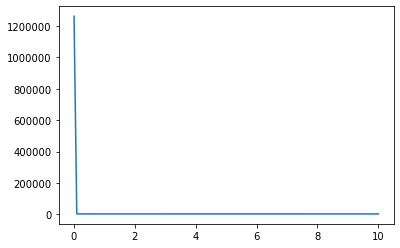

In [157]:
plt.plot(lambda_list,error_cv)
plt.title('Error on cross-validation data vs regularization factor, Quadratic regularization')
plt.xlabel('lambda')
plt.ylabel('rmse error')

In [158]:
error_list = np.array(error_list)
df_error = pd.DataFrame({"lambda":lambda_list, "Error":error_cv})
df_error.sort_values(by=["Error"], ascending=True, inplace=True)
df_error

,lambda,Error
2,1.00,1.919200e+03
3,5.00,1.968610e+03
1,0.10,1.979534e+03
4,10.00,2.012664e+03
0,0.01,1.262689e+06


In [297]:
l = 1
phi_tr = f(trDS3,l,optClds3)[0]
phi_t = f(tDS3,l,optClds3)[0]
w = (np.linalg.inv(phi_tr.T @ phi_tr + l*np.identity(phi_tr.shape[1])) @ phi_tr.T) @ trDS3['Next_Tmax']
pred_t = phi_t @ w
pred_tr = phi_tr @ w

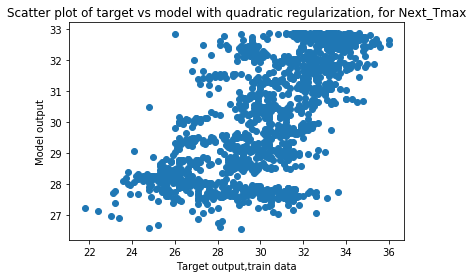

In [298]:
plt.scatter(trDS3.iloc[:,18],pred_tr)
plt.xlabel("Target output,train data")
plt.ylabel("Model output")
plt.title("Scatter plot of target vs model with quadratic regularization, for Next_Tmax")
plt.savefig("scatter_ds3quadtrainT_max.png")
plt.show()

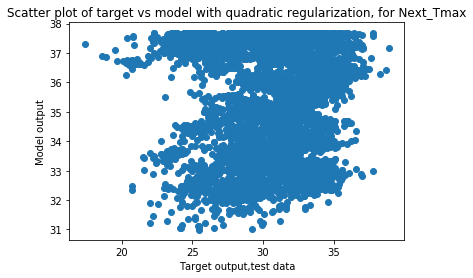

In [299]:
plt.scatter(tDS3.iloc[:,18],pred_t)
plt.xlabel("Target output,test data")
plt.ylabel("Model output")
plt.title("Scatter plot of target vs model with quadratic regularization, for Next_Tmax")
plt.savefig("scatter_ds3quadtestT_max.png")
plt.show()

In [300]:
#Tikhonov reg for "Next_Tmin"

error_tr = []
error_cv = []
error_t = []
for l in range(len(lambda_list)):
#for l in [1]:
    phi_tr,mu_list,sig = f(trDS3,l,optClds3)
    phi_cv = f(cvDS2,l,optClds3)[0]
    phi_t = f(tDS2,l,optClds3)[0]
    #print(phi_tr.shape)
    #print(mu_list.shape)
    tikh = tikhanov_reg(phi_tr,mu_list,sig,l)
    #print("tikh shape ", tikh.shape)
    #print("phi_tr shape ", phi_tr.shape)
    #print("trDS2_y shape ", trDS2["y"].shape)

    w = tikh @ trDS3['Next_Tmin']
    pred_cv = phi_cv @ w
    pred_t = phi_t @ w
    pred_tr = phi_tr @ w
    error_cv.append(np.linalg.norm(cvDS3['Next_Tmin'].to_numpy().reshape(-1,1)-pred_cv))
    error_t.append(np.linalg.norm(tDS3['Next_Tmin'].to_numpy().reshape(-1,1)-pred_t))
    error_tr.append(np.linalg.norm(trDS3['Next_Tmin'].to_numpy().reshape(-1,1)-pred_tr))

In [242]:
pd.DataFrame(list(zip(lambda_list,error_tr,error_cv,error_t)),columns=["Lambda", "RMSE Train","RMSE CV","RMSE test"])

,Lambda,RMSE Train,RMSE CV,RMSE test
0,0.01,3059.223194,372783.231388,1.642680e+06
1,0.10,3092.707918,351541.731256,1.492223e+06
2,1.00,3129.910309,414375.336831,1.647011e+06
3,5.00,3166.966986,468313.254877,1.788384e+06
4,10.00,3202.552978,514801.865450,1.915076e+06


Text(0, 0.5, 'rmse error')

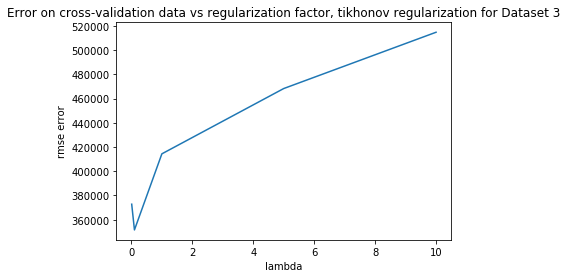

In [301]:
plt.plot(lambda_list,error_cv)
plt.title('Error on cross-validation data vs regularization factor, tikhonov regularization for Dataset 3')
plt.xlabel('lambda')
plt.ylabel('rmse error')

(array([  2.,  20.,  58., 107., 276., 352., 262., 176., 104.,  43.]),
 array([17.8 , 18.85, 19.9 , 20.95, 22.  , 23.05, 24.1 , 25.15, 26.2 ,
        27.25, 28.3 ]),
 <a list of 10 Patch objects>)

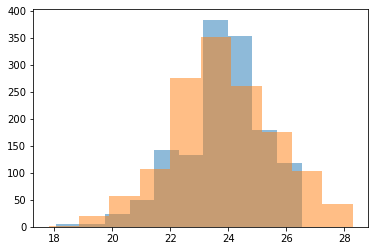

In [244]:
plt.hist(pred_tr, alpha=0.5)
plt.hist(trDS3["Next_Tmin"], alpha=0.5)

In [245]:
error_list = np.array(error_list)
df_error = pd.DataFrame({"lambda":lambda_list, "Error":error_cv})
df_error.sort_values(by=["Error"], ascending=True, inplace=True)
df_error

,lambda,Error
1,0.10,351541.731256
0,0.01,372783.231388
2,1.00,414375.336831
3,5.00,468313.254877
4,10.00,514801.865450


In [302]:
l = .1
phi_tr = f(trDS3,l,optClds3)[0]
phi_t = f(tDS3,l,optClds3)[0]
tikh = tikhanov_reg(phi_tr,mu_list,sig,0.01)
w = tikh @ trDS3["Next_Tmin"]
w = (np.linalg.inv(phi_tr.T @ phi_tr + 0.1*np.identity(phi_tr.shape[1])) @ phi_tr.T) @ trDS3["Next_Tmin"]
pred_t = phi_t @ w
pred_tr = phi_tr @ w

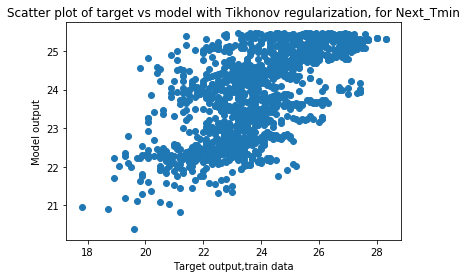

In [303]:
plt.scatter(trDS3.iloc[:,17],pred_tr)
plt.xlabel("Target output,train data")
plt.ylabel("Model output")
plt.title("Scatter plot of target vs model with Tikhonov regularization, for Next_Tmin")
plt.savefig("scatter_ds3tikhtrainT_min.png")
plt.show()

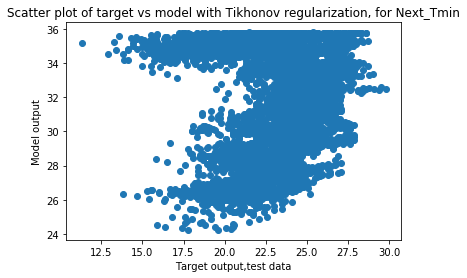

In [304]:
plt.scatter(tDS3.iloc[:,17],pred_t)
plt.xlabel("Target output,test data")
plt.ylabel("Model output")
plt.title("Scatter plot of target vs model with Tikhonov regularization, for Next_Tmin")
plt.savefig("scatter_ds3tikhtrainT_min.png")
plt.show()

In [307]:
#Tikhonov reg for "Next_Tmax"
error_tr = []
error_cv = []
error_t = []
for l in range(len(lambda_list)):
#for l in [1]:
    phi_tr,mu_list,sig = f(trDS3,l,optClds3)
    phi_cv = f(cvDS2,l,optClds3)[0]
    phi_t = f(tDS2,l,optClds3)[0]
    #print(phi_tr.shape)
    #print(mu_list.shape)
    n = len(trDS3)
    tikh = tikhanov_reg(phi_tr,mu_list,sig,l)
    #print("tikh shape ", tikh.shape)
    #print("phi_tr shape ", phi_tr.shape)
    #print("trDS2_y shape ", trDS2["y"].shape)

    w = tikh @ trDS3['Next_Tmax']
    pred_cv = phi_cv @ w
    pred_t = phi_t @ w
    pred_tr = phi_tr @ w
    error_cv.append(np.linalg.norm(cvDS3['Next_Tmax'].to_numpy().reshape(-1,1)-pred_cv))
    error_t.append(np.linalg.norm(tDS3['Next_Tmax'].to_numpy().reshape(-1,1)-pred_t))
    error_tr.append(np.linalg.norm(trDS3['Next_Tmax'].to_numpy().reshape(-1,1)-pred_tr))

In [238]:
pd.DataFrame(list(zip(lambda_list,error_tr,error_cv,error_t)),columns=["Lambda", "RMSE Train","RMSE CV","RMSE test"])

,Lambda,RMSE Train,RMSE CV,RMSE test
0,0.01,4929.016531,491607.676865,1.208803e+06
1,0.10,4936.219276,407910.318949,1.548913e+06
2,1.00,4960.572269,407166.428711,1.425182e+06
3,5.00,4989.830180,426239.501186,1.377835e+06
4,10.00,5020.957274,454968.679171,1.382870e+06


Text(0, 0.5, 'rmse error')

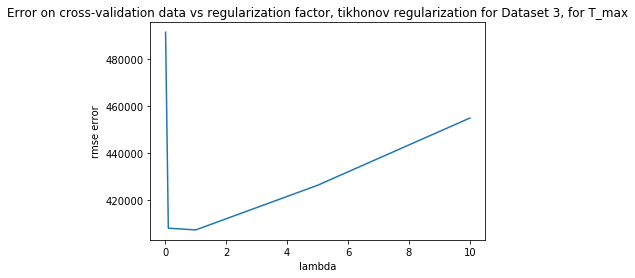

In [306]:
plt.plot(lambda_list,error_cv)
plt.title('Error on cross-validation data vs regularization factor, tikhonov regularization for Dataset 3, for T_max')
plt.xlabel('lambda')
plt.ylabel('rmse error')

(array([  6.,  17., 103., 159., 129., 265., 249., 271., 170.,  31.]),
 array([21.8 , 23.22, 24.64, 26.06, 27.48, 28.9 , 30.32, 31.74, 33.16,
        34.58, 36.  ]),
 <a list of 10 Patch objects>)

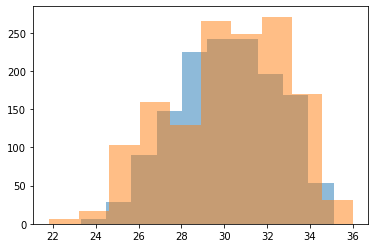

In [240]:
plt.hist(pred_tr, alpha=0.5)
plt.hist(trDS3["Next_Tmax"], alpha=0.5)

In [233]:
error_list = np.array(error_list)
df_error = pd.DataFrame({"lambda":lambda_list, "Error":error_cv})
df_error.sort_values(by=["Error"], ascending=True, inplace=True)
df_error

,lambda,Error
0,0.01,1.640078e+08
3,5.00,2.884711e+08
2,1.00,2.946890e+08
1,0.10,3.020493e+08
4,10.00,3.041905e+08


In [308]:
l = .01
phi_tr = f(trDS3,l,optClds3)[0]
phi_t = f(tDS3,l,optClds3)[0]
tikh = tikhanov_reg(phi_tr,mu_list,sig,0.01)
w = tikh @ trDS3["Next_Tmax"]
w = (np.linalg.inv(phi_tr.T @ phi_tr + 0.1*np.identity(phi_tr.shape[1])) @ phi_tr.T) @ trDS3["Next_Tmax"]
pred_t = phi_t @ w
pred_tr = phi_tr @ w

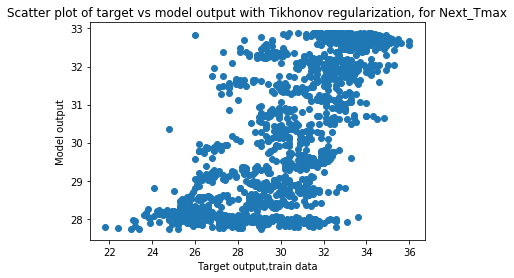

In [310]:
plt.scatter(trDS3.iloc[:,18],pred_tr)
plt.xlabel("Target output,train data")
plt.ylabel("Model output")
plt.title("Scatter plot of target vs model output with Tikhonov regularization, for Next_Tmax")
plt.savefig("scatter_ds3tikhtrainT_max.png")
plt.show()

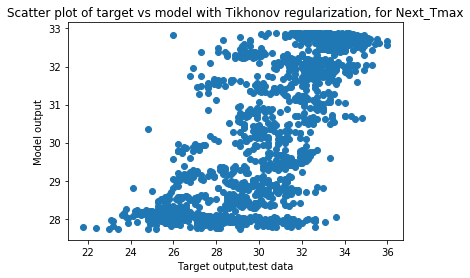

In [311]:
plt.scatter(trDS3.iloc[:,18],pred_tr)
plt.xlabel("Target output,test data")
plt.ylabel("Model output")
plt.title("Scatter plot of target vs model with Tikhonov regularization, for Next_Tmax")
plt.savefig("scatter_ds3tikhtestT_min.png")
plt.show()